In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import csv   
from collections import Counter


# To create grid in graph 
plt.style.use('ggplot')


In [47]:
lead = pd.read_excel('Lead list.xlsx')

In [48]:
lead.shape

(9751, 26)

In [49]:
lead.dtypes

Lead ID                         int64
Company                        object
First Name                     object
Interest                       object
Last Name                      object
Job Title                      object
Function                       object
Department                     object
Country                        object
City                           object
State                          object
Qualification Level            object
Approval Status               float64
Status                         object
Owner                          object
Source                         object
Campaign                       object
BCDS                           object
Start Date             datetime64[ns]
End Date               datetime64[ns]
Owner (Sales)                  object
Marketing Unit                 object
Created On             datetime64[ns]
Order Type                     object
Type of Deployment             object
Telemarketing                  object
dtype: objec

In [50]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9751 entries, 0 to 9750
Data columns (total 26 columns):
Lead ID                9751 non-null int64
Company                9751 non-null object
First Name             998 non-null object
Interest               7212 non-null object
Last Name              9293 non-null object
Job Title              1666 non-null object
Function               3205 non-null object
Department             111 non-null object
Country                9751 non-null object
City                   7129 non-null object
State                  9751 non-null object
Qualification Level    8009 non-null object
Approval Status        0 non-null float64
Status                 9751 non-null object
Owner                  9750 non-null object
Source                 9736 non-null object
Campaign               9597 non-null object
BCDS                   9751 non-null object
Start Date             9751 non-null datetime64[ns]
End Date               9751 non-null datetime64[ns]
Ow

In [41]:
lead.head()

,Lead ID,Company,First Name,Interest,Last Name,Job Title,Function,Department,Country,City,...,Campaign,BCDS,Start Date,End Date,Owner (Sales),Marketing Unit,Created On,Order Type,Type of Deployment,Telemarketing
0,1,K0.110276218363673,V0.296680287495188,NaN,L0.104646531512644,NaN,NaN,NaN,MY - Malaysia,Negeri Sembilan,...,I0.391631759590144,No,2015-12-18,2016-01-17,Br0.911667618331284,Agency – APJ & GC,2015-12-18 17:17:46,Net New Name,NaN,No
1,2,Chiu 0.181724848808863,D0.793097101838541,NaN,Law0.141693355411763,NaN,Chief Financial Off.,NaN,SG - Singapore,Singapore,...,NaN,No,2015-12-21,2016-01-20,B0.140056368343474,Agency – APJ & GC,2015-12-21 13:39:36,Net New Name,NaN,No
2,3,Jubi0.243193679883446,Ker0.141418247925814,NaN,Ng0.753960335680345,NaN,Manager/Head of Dept,NaN,MY - Malaysia,Johor,...,In0.171673906743614,No,2015-12-22,2016-01-21,Br0.911667618331284,Agency – APJ & GC,2015-12-22 11:45:34,Net New Name,NaN,No
3,4,N0.481656517350652,Fik0.950054552966336,S0.339684857366336,F0.590961171612745,NaN,NaN,NaN,ID - Indonesia,NaN,...,Inbou0.730048335995578,No,2015-12-22,2016-01-21,Lil0.0599107045448859,Agency – APJ & GC,2015-12-22 16:25:28,Net New Name,NaN,No
4,5,Valia0.426231463054591,Iona0.294287981536498,NaN,Ison0.826191754811968,NaN,NaN,NaN,PH - Philippines,NaN,...,I0.325948292202346,No,2015-12-22,2016-01-21,Ald0.448775353247287,Agency – APJ & GC,2015-12-22 17:35:21,Net New Name,NaN,No


In [42]:
Counter(lead['Country'])

Counter({'MY - Malaysia': 1284,
         'SG - Singapore': 4482,
         'ID - Indonesia': 1085,
         'PH - Philippines': 1297,
         'TH - Thailand': 900,
         'VN - Vietnam': 682,
         'MM - Myanmar': 20,
         'KH - Cambodia': 1})

In [9]:
lead_accept = pd.read_excel('Lead list_accept.xlsx')

In [10]:
country = lead['Country'].value_counts()
country = pd.DataFrame(country).reset_index()
country.columns = ['country', 'count']
country

,country,count
0,SG - Singapore,4482
1,PH - Philippines,1297
2,MY - Malaysia,1284
3,ID - Indonesia,1085
4,TH - Thailand,900
5,VN - Vietnam,682
6,MM - Myanmar,20
7,KH - Cambodia,1


In [11]:
country_accept = lead_accept['Country'].value_counts()
country_accept = pd.DataFrame(country_accept).reset_index()
country_accept.columns = ['country', 'count']
country_accept

,country,count
0,SG - Singapore,1733
1,PH - Philippines,1151
2,MY - Malaysia,1047
3,ID - Indonesia,787
4,VN - Vietnam,642
5,TH - Thailand,620
6,MM - Myanmar,20
7,KH - Cambodia,1


[Text(0.5, 1.0, 'Count by Country where Status is Positive')]

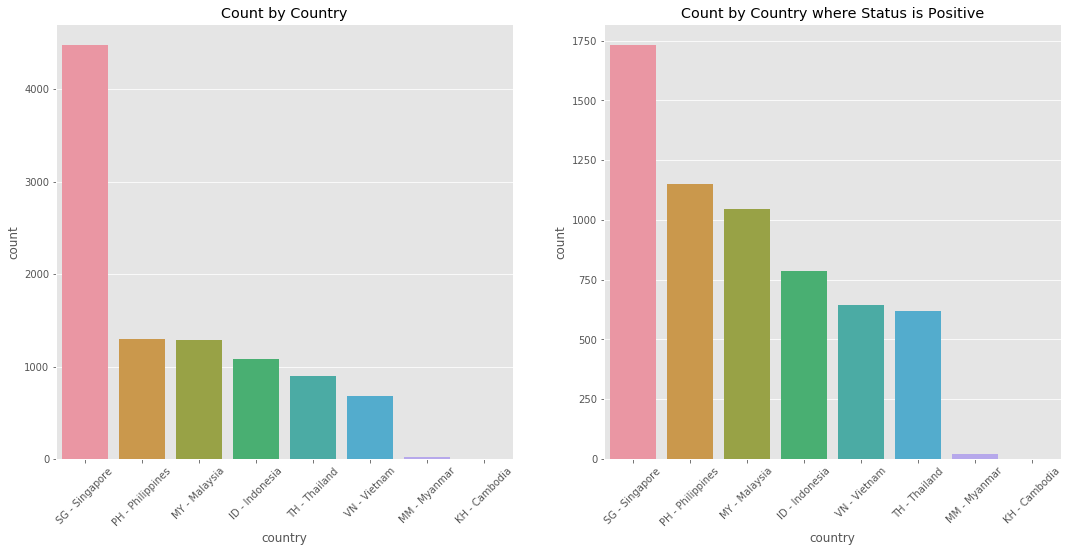

In [43]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

a=sns.barplot(data=country, x='country', y='count', ax=ax1)
a.set_xticklabels(a.get_xticklabels(), rotation=45)    
a

b=sns.barplot(data=country_accept, x='country', y='count', ax=ax2)
b.set_xticklabels(b.get_xticklabels(), rotation=45)    
b

ax1.set(title="Count by Country")
ax2.set(title="Count by Country where Status is Positive")

In [13]:
qualification_level = lead['Qualification Level'].value_counts()
qualification_level = pd.DataFrame(qualification_level).reset_index()
qualification_level.columns = ['Qualification Level', 'count']
qualification_level

,Qualification Level,count
0,Warm,3631
1,Cold,2472
2,Hot,1906


In [14]:
qualification_level_accept = lead_accept['Qualification Level'].value_counts()
qualification_level_accept = pd.DataFrame(qualification_level_accept).reset_index()
qualification_level_accept.columns = ['Qualification Level', 'count']
qualification_level_accept

,Qualification Level,count
0,Warm,3293
1,Hot,1635
2,Cold,165


[Text(0.5, 1.0, 'Count by Qualification Level where Status is Positive')]

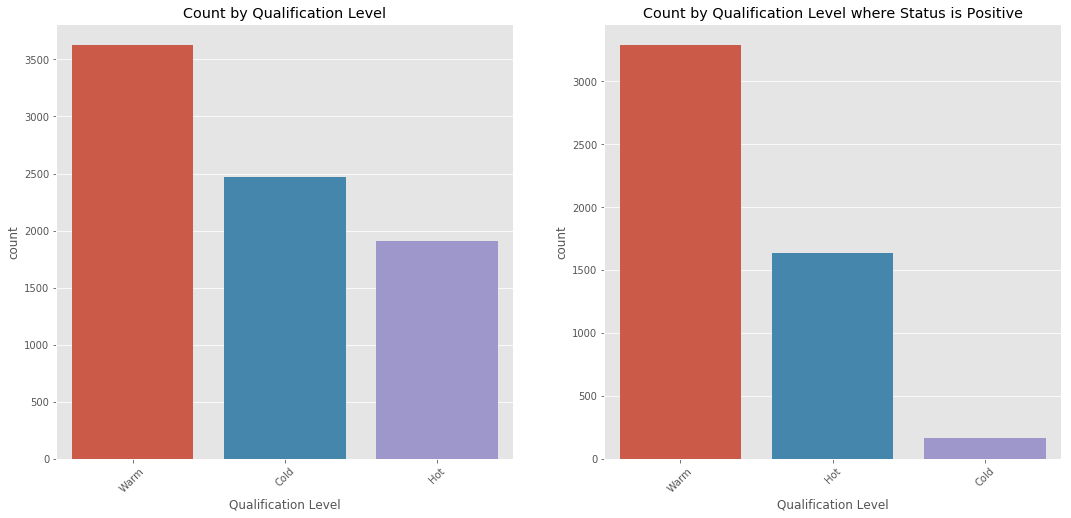

In [15]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

a=sns.barplot(data=qualification_level, x='Qualification Level', y='count', ax=ax1)
a.set_xticklabels(a.get_xticklabels(), rotation=45)    
a

b=sns.barplot(data=qualification_level_accept, x='Qualification Level', y='count', ax=ax2)
b.set_xticklabels(b.get_xticklabels(), rotation=45)    
b

ax1.set(title="Count by Qualification Level")
ax2.set(title="Count by Qualification Level where Status is Positive")

In [16]:
status = lead['Status'].value_counts()
status = pd.DataFrame(status).reset_index()
status.columns = ['Status', 'count']
status

,Status,count
0,Converted,3956
1,Discontinued,1648
2,Qualified,1607
3,Declined,1475
4,Open,617
5,In Qualification,407
6,Accepted,31
7,In Dispatching,10


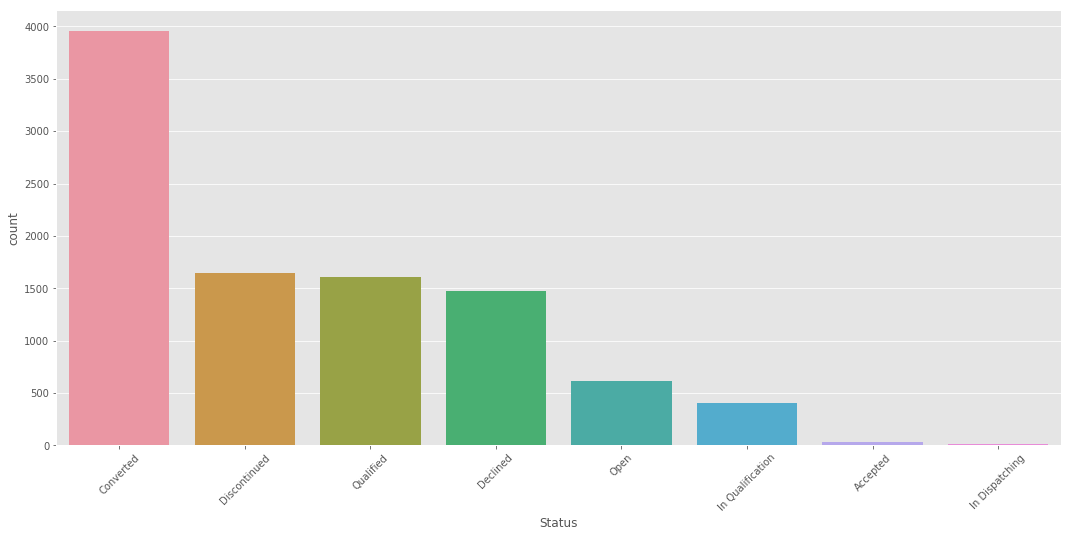

In [63]:
barplot=sns.barplot(data=status, x='Status', y='count')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)  
barplot.figure.set_size_inches(18,8)

In [18]:
source = lead['Source'].value_counts()
source = pd.DataFrame(source).reset_index()
source.columns = ['source', 'count']
source

,source,count
0,Campaign,5964
1,DDA Handover,1826
2,Int Digital Marketing / Paid Search,712
3,Int Inbound Call,316
4,Int Inbound Chat,244
5,Int Outbound,200
6,Partner,121
7,Int Inbound Email,96
8,Int Outbound Telemarketing,83
9,Int Paid Media,76


In [19]:
source_accept = lead_accept['Source'].value_counts()
source_accept = pd.DataFrame(source_accept).reset_index()
source_accept.columns = ['source', 'count']
source_accept

,source,count
0,Campaign,4741
1,Int Inbound Call,268
2,Int Inbound Chat,207
3,Int Outbound,173
4,Int Digital Marketing / Paid Search,154
5,Partner,120
6,Int Inbound Email,85
7,Int Outbound Telemarketing,68
8,DDA Handover,57
9,Int Inbound Web,24


[Text(0.5, 1.0, 'Count by Source')]

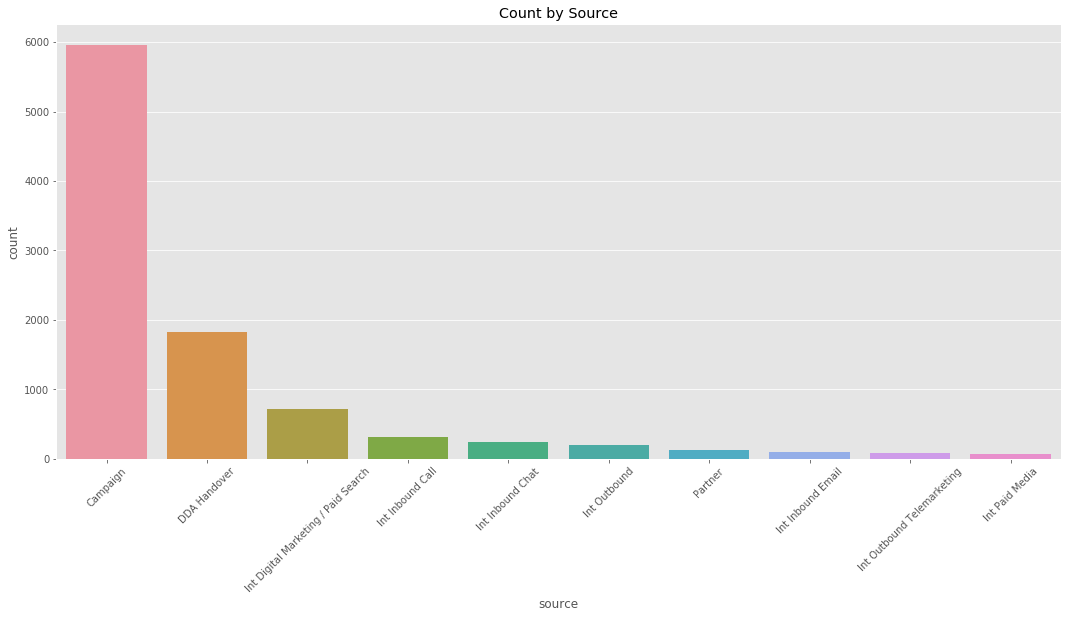

In [65]:
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)


a=sns.barplot(data=source.head(10), x='source', y='count', ax=ax1)
a.set_xticklabels(a.get_xticklabels(), rotation=45)    
a.figure.set_size_inches(18,8)

ax1.set(title="Count by Source")


[Text(0.5, 1.0, 'Count by Source where Status is Positive')]

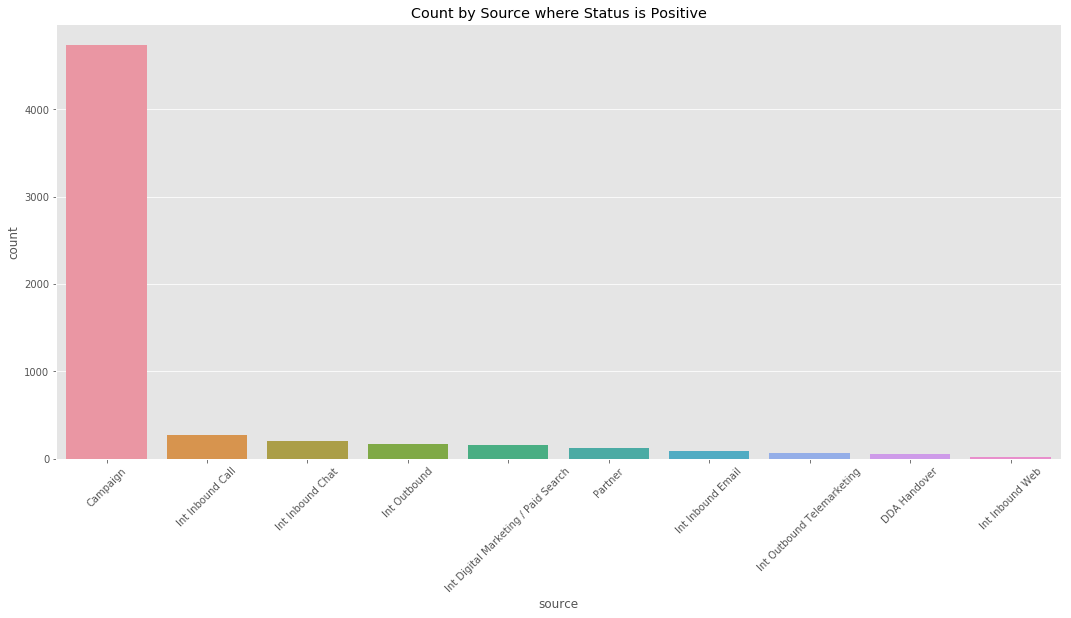

In [64]:
figure, ((ax2)) = plt.subplots(nrows=1, ncols=1)

b=sns.barplot(data=source_accept.head(10), x='source', y='count', ax=ax2)
b.set_xticklabels(b.get_xticklabels(), rotation=45)    
b.figure.set_size_inches(18,8)
ax2.set(title="Count by Source where Status is Positive")

In [22]:
campaign = lead['Campaign'].value_counts()
campaign = pd.DataFrame(campaign).reset_index()
campaign.columns = ['campaign', 'count']
campaign.head(10)

,campaign,count
0,C10.15534930756509,1830
1,SEA0.739222527980859,1750
2,S570.840643869202581,450
3,SEA B0.22653596253569,436
4,C1 PH0.643351054680762,284
5,S57 0.687493322850899,248
6,I0.852939348645212,243
7,C1 T0.537470745631731,235
8,C10.438128114732735,218
9,S0.47598109258643,205


In [23]:
campaign_accept = lead_accept['Campaign'].value_counts()
campaign_accept = pd.DataFrame(campaign_accept).reset_index()
campaign_accept.columns = ['campaign', 'count']
campaign_accept.head(10)

,campaign,count
0,SEA0.739222527980859,1437
1,SEA B0.22653596253569,436
2,C1 PH0.643351054680762,284
3,C1 T0.537470745631731,235
4,C10.438128114732735,218
5,I0.852939348645212,217
6,PH 0.396907836917172,170
7,N0.0549246909251145,145
8,B0.850049533707717,128
9,Inbo0.285221104869734,125


[Text(0.5, 1.0, 'Count by Campaign')]

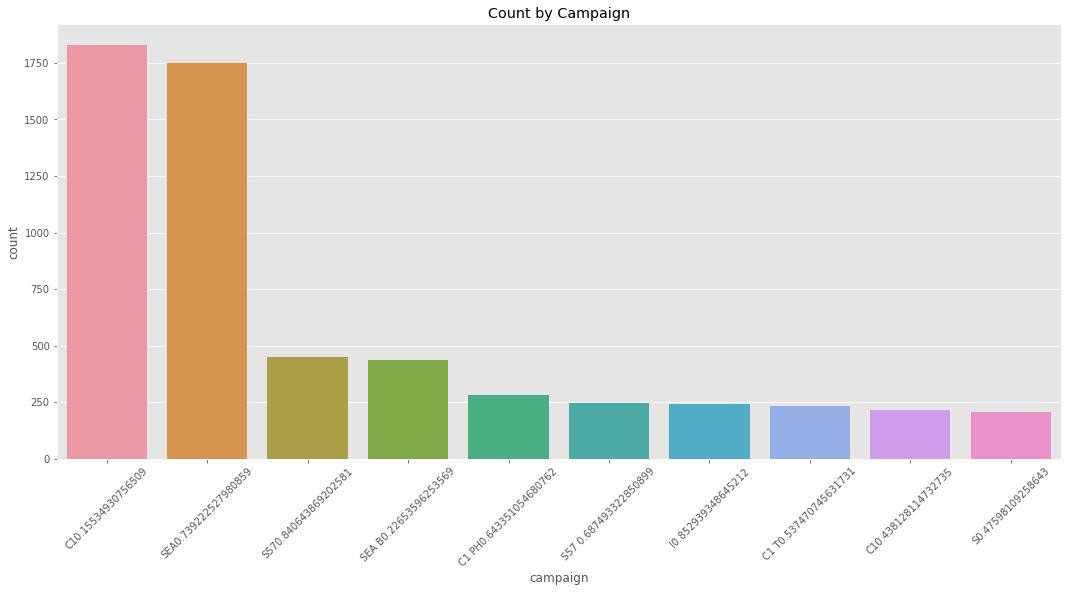

In [67]:
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)


a=sns.barplot(data=campaign.head(10), x='campaign', y='count', ax=ax1)
a.set_xticklabels(a.get_xticklabels(), rotation=45)    
a.figure.set_size_inches(18,8)

ax1.set(title="Count by Campaign")

[Text(0.5, 1.0, 'Count by Campaign where Status is Positive')]

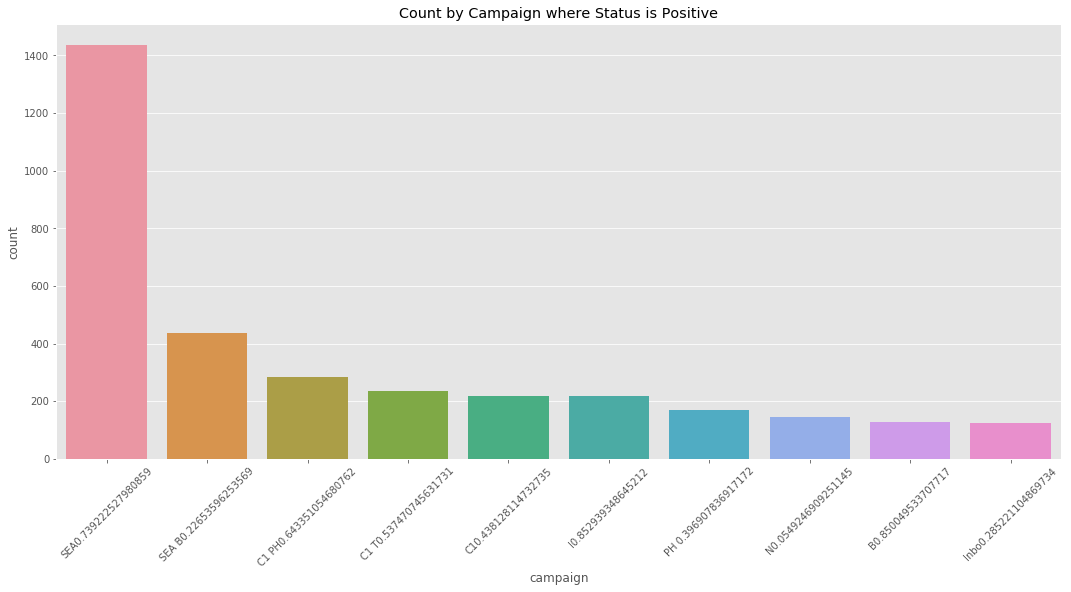

In [68]:
figure, ((ax2)) = plt.subplots(nrows=1, ncols=1)


b=sns.barplot(data=campaign_accept.head(10), x='campaign', y='count', ax=ax2)
b.set_xticklabels(b.get_xticklabels(), rotation=45)    
b.figure.set_size_inches(18,8)

ax2.set(title="Count by Campaign where Status is Positive")

In [26]:
type_of_deployment = lead['Type of Deployment'].value_counts()
type_of_deployment = pd.DataFrame(type_of_deployment).reset_index()
type_of_deployment.columns = ['type of deployment', 'count']
type_of_deployment

,type of deployment,count
0,Cloud hosted by Partner,934
1,On Premise,918
2,Cloud hosted by Int,105


In [27]:
type_of_deployment_accept = lead_accept['Type of Deployment'].value_counts()
type_of_deployment_accept = pd.DataFrame(type_of_deployment_accept).reset_index()
type_of_deployment_accept.columns = ['type of deployment', 'count']
type_of_deployment_accept

,type of deployment,count
0,On Premise,788
1,Cloud hosted by Partner,787
2,Cloud hosted by Int,103


[Text(0.5, 1.0, 'Count by Type of Deployment where Status is Positive')]

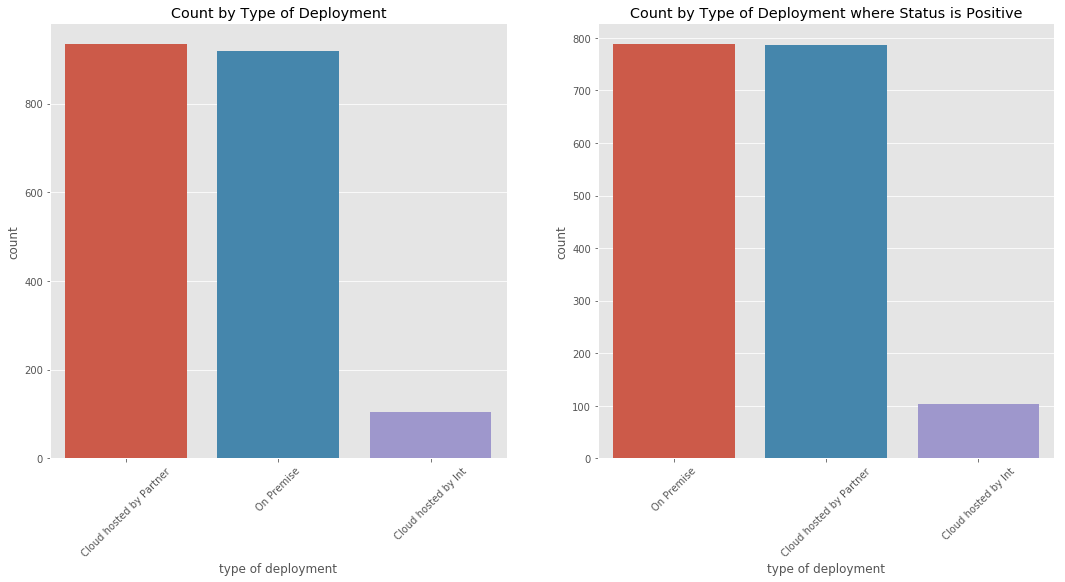

In [28]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

a=sns.barplot(data=type_of_deployment, x='type of deployment', y='count', ax=ax1)
a.set_xticklabels(a.get_xticklabels(), rotation=45)    
a

b=sns.barplot(data=type_of_deployment_accept, x='type of deployment', y='count', ax=ax2)
b.set_xticklabels(b.get_xticklabels(), rotation=45)    
b

ax1.set(title="Count by Type of Deployment")
ax2.set(title="Count by Type of Deployment where Status is Positive")

In [29]:
telemarketing = lead['Telemarketing'].value_counts()
telemarketing = pd.DataFrame(telemarketing).reset_index()
telemarketing.columns = ['telemarketing', 'count']
telemarketing

,telemarketing,count
0,No,9050
1,Yes,701


In [33]:
telemarketing_accept = lead_accept['Telemarketing'].value_counts()
telemarketing_accept = pd.DataFrame(telemarketing_accept).reset_index()
telemarketing_accept.columns = ['telemarketing', 'count']
telemarketing_accept

,telemarketing,count
0,No,5406
1,Yes,595


[Text(0.5, 1.0, 'Count by Telemarketing where Status is Positive')]

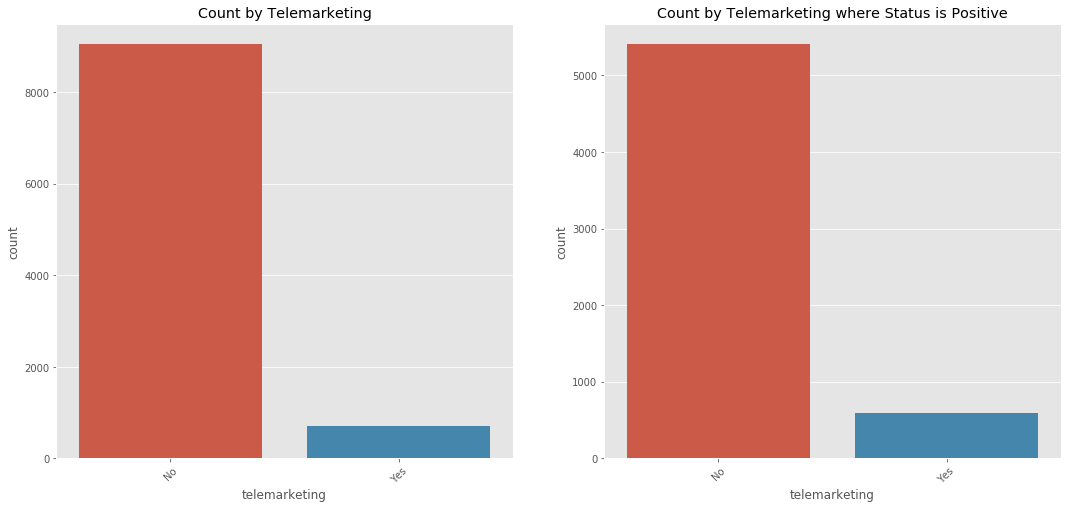

In [35]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

a=sns.barplot(data=telemarketing, x='telemarketing', y='count', ax=ax1)
a.set_xticklabels(a.get_xticklabels(), rotation=45)    
a

b=sns.barplot(data=telemarketing_accept, x='telemarketing', y='count', ax=ax2)
b.set_xticklabels(b.get_xticklabels(), rotation=45)    
b

ax1.set(title="Count by Telemarketing")
ax2.set(title="Count by Telemarketing where Status is Positive")

In [ ]:
#<SAS Programming Code>

data a1;
input x y count @@;
cards;
1 1 4741   1 0 1223
2 1 57      2 0 1769
3 1 154      3 0 558
4 1 268      4 0 48
5 1 207    5 0 37
6 1 173      6 0 27
;
run;

proc logistic data=a1 desc;
class x;
model y=x/scale=none aggregate;
